In [1]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils.multiclass import unique_labels

In [2]:
def plot(y_val, y_pred, title):
    labels = unique_labels(y_train)
    column = [f'Predi {label}' for label in labels]
    indices = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_val, y_pred),
                         columns=column,index=indices)
    
    heatmap = sns.heatmap(table, annot=True, fmt='d', cmap='viridis')
    heatmap.set_title(title)
    return heatmap

In [3]:
def resultadosModelo(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    classification_rep = classification_report(y_true, y_pred, zero_division=1)
    print("Precisión:", accuracy)
    print("Informe de Clasificación:\n")
    print(classification_rep)

In [4]:
datos = pd.read_csv("winequalityN.csv") 

In [6]:
red_data = datos[datos['type'] == 'red']
white_data = datos[datos['type'] == 'white']

In [7]:
x = red_data.drop(['quality'], axis=1)
y = red_data['quality']

In [8]:
random_over = RandomOverSampler()

In [9]:
x_over, y_over = random_over.fit_resample(x, y)

In [10]:
np.unique(y_over, return_counts=True)

(array([3, 4, 5, 6, 7, 8], dtype=int64),
 array([681, 681, 681, 681, 681, 681], dtype=int64))

In [11]:
datos_over = pd.concat([x_over, y_over], axis=1)

In [12]:
datos_over

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4081,red,12.6,0.31,0.72,2.2,0.072,6.0,29.0,0.99870,2.88,0.82,9.8,8
4082,red,5.5,0.49,0.03,1.8,0.044,28.0,87.0,0.99080,3.50,0.82,14.0,8
4083,red,10.0,0.26,0.54,1.9,0.083,42.0,74.0,0.99451,2.98,0.63,11.8,8
4084,red,8.6,0.42,0.39,1.8,0.068,6.0,12.0,0.99516,3.35,0.69,11.7,8


In [13]:
datos_over['quality'].value_counts()

quality
5    681
6    681
7    681
4    681
8    681
3    681
Name: count, dtype: int64

<Axes: title={'center': 'OverS'}, xlabel='quality'>

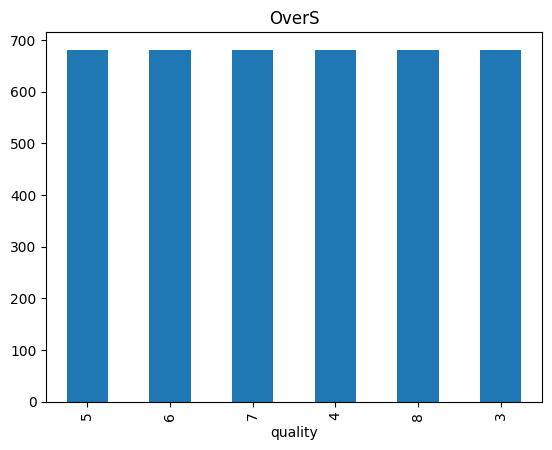

In [14]:
datos_over['quality'].value_counts().plot(kind='bar', title='OverS')

In [17]:
datos_over=datos_over.drop(['type'], axis=1)

In [18]:
datos_over

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
4081,12.6,0.31,0.72,2.2,0.072,6.0,29.0,0.99870,2.88,0.82,9.8,8
4082,5.5,0.49,0.03,1.8,0.044,28.0,87.0,0.99080,3.50,0.82,14.0,8
4083,10.0,0.26,0.54,1.9,0.083,42.0,74.0,0.99451,2.98,0.63,11.8,8
4084,8.6,0.42,0.39,1.8,0.068,6.0,12.0,0.99516,3.35,0.69,11.7,8


In [19]:
X = datos_over.drop('quality', axis=1)
Y = datos_over['quality']

In [20]:
mean = X.mean(axis=0)
std = X.std(axis=0)
data_normalized = (X - mean) / std

In [21]:
data_normalized

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.504148,0.447750,-1.239114,-0.496415,-0.238834,-0.282732,-0.132640,0.637630,1.057630,-0.583711,-1.060489
1,-0.283320,1.125695,-1.239114,-0.021645,0.186157,1.085692,0.936714,0.149177,-0.764265,0.082459,-0.742458
2,-0.283320,0.673731,-1.054724,-0.225118,0.070250,0.108246,0.515453,0.246867,-0.411640,-0.084083,-0.742458
3,1.593713,-1.134122,1.342346,-0.496415,-0.258151,0.303735,0.709881,0.735321,-0.999348,-0.472682,-0.742458
4,-0.504148,0.447750,-1.239114,-0.496415,-0.238834,-0.282732,-0.132640,0.637630,1.057630,-0.583711,-1.060489
...,...,...,...,...,...,...,...,...,...,...,...
4081,2.366609,-1.021131,2.079906,-0.292942,-0.316105,-0.771455,-0.294664,1.077238,-2.644931,0.859657,-0.742458
4082,-1.553078,-0.343186,-1.100822,-0.564239,-0.857001,1.378926,1.584807,-2.781543,0.998859,0.859657,2.596866
4083,0.931231,-1.209449,1.250151,-0.496415,-0.103609,2.747350,1.163547,-0.969381,-2.057223,-0.195112,0.847696
4084,0.158334,-0.606831,0.558688,-0.564239,-0.393375,-0.771455,-0.845543,-0.651887,0.117297,0.137973,0.768189


In [26]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(data_normalized ,Y, test_size=0.3, random_state=42)

In [32]:
# Eliminar filas con valores NaN
X_train = X_train.dropna()
y_train = y_train[X_train.index]  # Asegúrate de actualizar y_train también

X_val = X_val.dropna()
y_val = y_val[X_val.index]  # Asegúrate de actualizar y_val también

# Luego, puedes usar X_train y X_val en tu modelo KNeighborsClassifier


In [40]:
# Verificar la forma de los conjuntos de datos después de eliminar filas con valores faltantes
print("Forma de X_train:", X_train.shape)
print("Forma de y_train:", y_train.shape)

print("\nForma de X_val:", X_val.shape)
print("Forma de y_val:", y_val.shape)


Forma de X_train: (2842, 11)
Forma de y_train: (2842,)

Forma de X_val: (1221, 11)
Forma de y_val: (1221,)


## K-means

In [33]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=1,leaf_size=80)
neigh.fit(X_train, y_train)
y_pred2 = neigh.predict(X_val)

In [34]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_neighbors': [1, 3, 5, 7],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2],
    'leaf_size':[10,20,40,60,80,100,120]
}

# Create the grid search object
grid_search = GridSearchCV(estimator=KNeighborsClassifier(),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best model

best_model = grid_search.best_estimator_

# Make predictions on the validation set using the best model
y_pred_prueba2 = best_model.predict(X_val)
y_test_prueba2 = best_model.predict(X_train)
best_params = grid_search.best_params_
best_params

{'algorithm': 'auto',
 'leaf_size': 10,
 'n_neighbors': 1,
 'p': 2,
 'weights': 'uniform'}

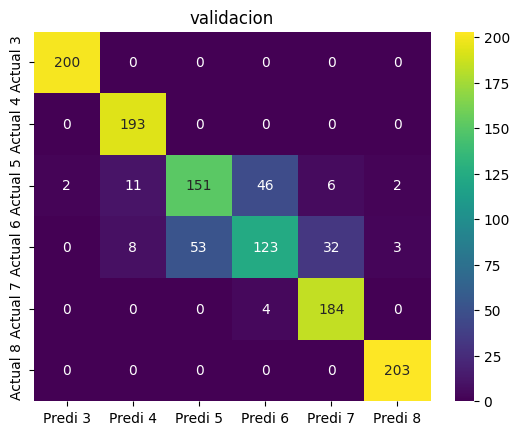

In [35]:
plot(y_val,y_pred_prueba2,"validacion")
plt.savefig("validacionKm.eps",format='eps')

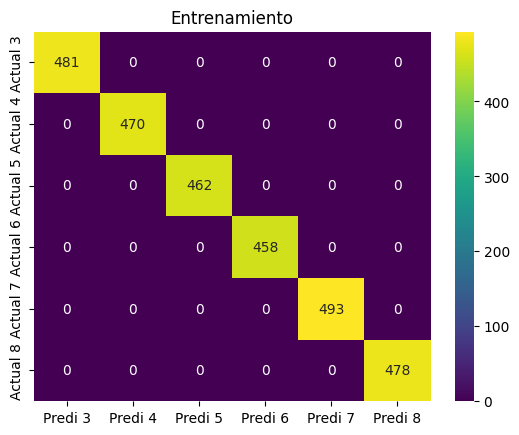

In [36]:
plot(y_train,y_test_prueba2,"Entrenamiento")
plt.savefig("EntrenamientoKm.eps",format='eps')

In [37]:
resultadosModelo(y_val, y_pred_prueba2)

Precisión: 0.8632268632268633
Informe de Clasificación:

              precision    recall  f1-score   support

           3       0.99      1.00      1.00       200
           4       0.91      1.00      0.95       193
           5       0.74      0.69      0.72       218
           6       0.71      0.56      0.63       219
           7       0.83      0.98      0.90       188
           8       0.98      1.00      0.99       203

    accuracy                           0.86      1221
   macro avg       0.86      0.87      0.86      1221
weighted avg       0.86      0.86      0.86      1221



In [38]:
resultadosModelo(y_train, y_test_prueba2)

Precisión: 1.0
Informe de Clasificación:

              precision    recall  f1-score   support

           3       1.00      1.00      1.00       481
           4       1.00      1.00      1.00       470
           5       1.00      1.00      1.00       462
           6       1.00      1.00      1.00       458
           7       1.00      1.00      1.00       493
           8       1.00      1.00      1.00       478

    accuracy                           1.00      2842
   macro avg       1.00      1.00      1.00      2842
weighted avg       1.00      1.00      1.00      2842

